## Predicts Stock Prices

In [1]:
import quandl
import numpy as np
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
ticker="^NSEI"
#ticker="BTC-USD"
#ticker="GBPUSD=X"
start='2012-01-01'
end='2021-08-01'
end2='2022-04-02'

## Get Stock Data

In [3]:
# getting data using yfinance
stock_data= yf.download(ticker, 
                      start=start, 
                      end=end, 
                      progress=False,
)

df=pd.DataFrame(stock_data["Adj Close"])


In [4]:
## Var for telling prediction for number of days
forecast=130
# Column with space to store predicted prices
df['Prediction']=df["Adj Close"].shift(-forecast)
#df['Prediciton']=df.shift(-1)


In [5]:
## numpy array
X=np.array(df.drop("Prediction", axis = 1))
#Remove the last 'n' rows
X=X[:-forecast]



In [6]:
## Create dependent dataset (Y)
y =np.array(df["Prediction"])
##get all y values minus forecast 
y=y[:-forecast]

In [7]:
# Split the data into training and testing data
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)


In [8]:
# Create and train linear Regressor Model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
#testing model(best possible score is 1)
lr_confidence=lr.score(x_test,y_test)
lr_confidence


0.7912622159229811

In [10]:
# Set x_forecast equal to last 20 rows of original data set from Adj Close
x_forecast=np.array(df.drop("Prediction", axis = 1))[-forecast:]

In [11]:
lr_prediction=lr.predict(x_forecast)


In [12]:
## Making new dataframe that contain more data
df2 = yf.download(ticker, 
                      start=start, 
                      end=end2, 
                      progress=False,
)

df2=pd.DataFrame(df2["Adj Close"])


In [13]:
df2=df2.iloc[0:len(df)+forecast]

In [14]:
len(df)

2344

In [15]:
len(df2)

2474

In [16]:
## Create new Dataframe to testing data and then combining forecast data
## pred_df : Predicted Data
pred_df=pd.DataFrame()

In [17]:




pred_df["Date"]=df2.index

In [18]:
a=[]
a=list(df["Adj Close"])
z=list(lr_prediction)

In [19]:
for val in z:
    a.append(val)

In [20]:
b=list(df2["Adj Close"])
for val in b:
    z.append(int(val))

In [21]:
pred_df["Forecast Price"]=(a)
pred_df["Actual Price"]=(b)

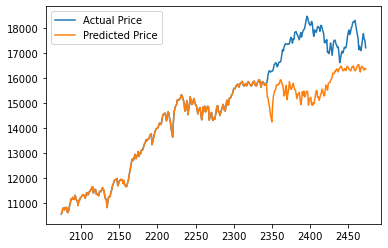

<Figure size 1080x864 with 0 Axes>

In [22]:
plt.plot(pred_df["Actual Price"].tail(400),label="Actual Price")

plt.plot(pred_df["Forecast Price"].tail(400),label="Predicted Price")
plt.legend()
plt.rcParams["figure.figsize"] = (15,12)
plt.figure()
plt.show()

## MODEL-I (YEARLY VOLITILITY STATISTICS)

In [23]:
ticker2="^NSEBANK"
start2="2022-01-01"
end2="2022-12-31"

In [24]:
bnf_data= yf.download(ticker2, 
                      start=start2, 
                      end=end2, 
                      progress=False,
)




In [25]:

bnf_data["Daily Change%"] = round((bnf_data["Adj Close"].pct_change(1)) *100,2)
bnf_data.head(6)

,Open,High,Low,Close,Adj Close,Volume,Daily Change%
Date,,,,,,,
2022-01-03,35585.199219,36492.101562,35526.601562,36421.898438,36421.898438,219000,NaN
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,1.15
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,2.32
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,-0.55
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,0.67
2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,38347.898438,206500,1.61


In [26]:
##change greater than 0% but lesser than 1.5%
minorchange=[]
##change greater than 1.5% but lesser than 3%
moderatechange=[]
##change greater than 3% 
extremechange=[]

for i in bnf_data["Daily Change%"]:
    if abs(i)>0 and abs(i)<1.5:
        minorchange.append(abs(i))
    if abs(i)>1.5 and abs(i)<3:
        moderatechange.append(abs(i))
    if abs(i)>3:
        extremechange.append(abs(i))
    

<AxesSubplot:xlabel='Date'>

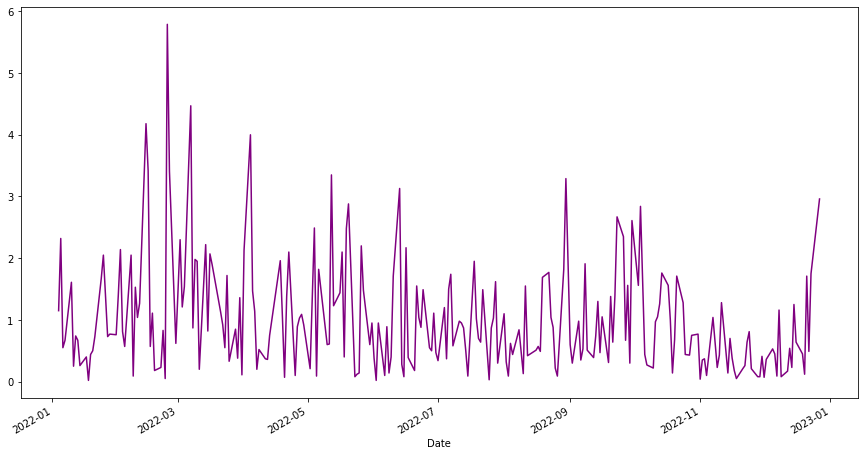

In [27]:
abs(bnf_data["Daily Change%"]).plot(figsize=(15,8),color="purple",label="Daily Change %")

## MODEL-III (CPR calculation)

In [28]:
######################################### Thesis Behind the model #############################################################################
######### CPR is calculation in which stocks or instruments previous day's high low and closing are calculated 
######### such that we can capture previous day's volitilty and be able too predict what kinfd of market is expected
######### on next trading day .
#####
#####
##### NarrowCpr is considered to be high volatitlity day as it suggests that on previous day instrument experienced big 
###### range movement and instrument might take a rest today as less number of participant will like to involve 
###### in instrument action 

###### WideCpr is considered to be Low volatitlity day as it suggests that on previous day instrument experienced narrow 
###### range movement and instrument might be looking to break ranges as more number of participant will like to involve 
###### in instrument action 


######################################## Formulae of CPR calculation  #####################################################
#########                 daily_pivot = (prevday_high + prevday_low + prevday_close)/3  ###################################   
#########                 daily_bc = (prevday_high + prevday_low)/2                     ###################################
#########                 daily_tc = 2 * daily_pivot - daily_bc                         ###################################
#########                 daily_r1 = 2 * daily_pivot - prevday_low                      ###################################
#########                 daily_r2 = daily_pivot + prevday_high - prevday_low           ################################### 
#########                 daily_r3 = daily_r1 + prevday_high - prevday_low              ###################################
#########                 daily_r4 = daily_r3 + daily_r2 - daily_r1                     ###################################
#########                 daily_s1 = 2 * daily_pivot - prevday_high                     ###################################
#########                 daily_s2 = daily_pivot - prevday_high + prevday_low           ###################################      
#########                 daily_s3 = daily_s1 - prevday_high + prevday_low              ###################################    
#########                 daily_s4 = daily_s3 + daily_s2 - daily_s1                     ################################ 
#######################################################################################################################

In [29]:
### CODE TO GET "end" DATE AS YESTERDAY'S DATE AND "start" DATE AS DATE EXACTLY YEAR FROM "end" DATE
from datetime import datetime as dt
from datetime import timedelta 
todayDate=dt.now().date()
#prevDate=todayDate-timedelta(hours=24)
end2=todayDate
start2=end2-timedelta(days=365)


In [30]:
#### Getting Instrument's Historical Data
ticker="^NSEBANK"
#ticker2="^NSEI"
start=start2
end=end2

df= yf.download(ticker2, 
                      start=start2, 
                      end=end2, 
                      progress=False,
)

## This will only calculate for the next day  

In [31]:
prevday_high=df["High"].iloc[-1]
prevday_close=df["Close"].iloc[-1]
prevday_low=df["Low"].iloc[-1]


daily_pivot = (prevday_high + prevday_low + prevday_close)/3 
daily_bc = (prevday_high + prevday_low)/2                    
daily_tc = 2 * daily_pivot - daily_bc                        
                  

In [32]:
dt=df.iloc[1:len(df)]

Pivot=[]
BottomCentralPivot=[]
TopCentralPivot=[]


## to make calculation on the whole dataframe
for i in range(len(df)):
    #print(df.iloc[i])
    if i==0:
        continue
    else:
        prevday_high=df["High"].iloc[i-1]
        prevday_close=df["Adj Close"].iloc[i-1]
        prevday_low=df["Low"].iloc[i-1]
        
        dailypivot=(prevday_high + prevday_low + prevday_close)/3
        dailybc=(prevday_high + prevday_low)/2 
        dailytc=(2 * dailypivot) - dailybc  
        
        Pivot.append(dailypivot) 
        BottomCentralPivot.append(dailybc)                   
        TopCentralPivot.append(dailytc)
        
        

In [33]:
####Getting the list into DataFrame
dj=pd.DataFrame()
dt["Pivot"]=Pivot
dt["BottomCentralPivot"]=BottomCentralPivot
dt["TopCentralPivot"]=TopCentralPivot


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\3672483073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Pivot"]=Pivot
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\3672483073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["BottomCentralPivot"]=BottomCentralPivot
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\3672483073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [34]:
cprdiff=[]
classifer=[]
cprdiffpercent=[]
## CPR CLASSIFICATION AS  NARROW AND WIDE
#find difference between TOP and BOTTOM Pivot
for i in range(len(Pivot)):
    cprdifference=abs(TopCentralPivot[i]-BottomCentralPivot[i])
    cprpercent=abs(round(((cprdifference/BottomCentralPivot[i])*100),2))
    
    cprdiffpercent.append(cprpercent)
    if cprpercent>0.25:
        classifer.append("WIDE")
    else:
        classifer.append("NARROW")
    

In [35]:
dt["cpr%"]=cprdiffpercent
dt["NARROW/WIDE"]=classifer

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\1120348366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["cpr%"]=cprdiffpercent
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\1120348366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["NARROW/WIDE"]=classifer


In [36]:
#dt.drop(columns=["Volume","Adj Close"],inplace=True)

dt["Daily Change%"] = round((dt["Close"].pct_change(1)) *100,2)
dt.tail(60)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\2267190708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Daily Change%"] = round((dt["Close"].pct_change(1)) *100,2)


,Open,High,Low,Close,Adj Close,Volume,Pivot,BottomCentralPivot,TopCentralPivot,cpr%,NARROW/WIDE,Daily Change%
Date,,,,,,,,,,,,
2022-09-28,38081.250000,38368.800781,37626.199219,37759.851562,37759.851562,210600,38531.515625,38617.699219,38445.332031,0.45,WIDE,-1.56
2022-09-29,38092.851562,38283.398438,37536.648438,37647.750000,37647.750000,253000,37918.283854,37997.500000,37839.067708,0.42,WIDE,-0.30
2022-09-30,37660.000000,38811.000000,37386.351562,38631.949219,38631.949219,246100,37822.598958,37910.023438,37735.174479,0.46,WIDE,2.61
2022-10-03,38444.898438,38641.601562,37963.250000,38029.648438,38029.648438,172900,38276.433594,38098.675781,38454.191406,0.93,WIDE,-1.56
2022-10-04,38700.398438,39177.500000,38596.898438,39110.050781,39110.050781,241100,38211.500000,38302.425781,38120.574219,0.47,WIDE,2.84
2022-10-06,39343.699219,39608.351562,39232.898438,39282.851562,39282.851562,158800,38961.483073,38887.199219,39035.766927,0.38,WIDE,0.44
2022-10-07,39093.500000,39235.050781,38807.500000,39178.050781,39178.050781,165000,39374.700521,39420.625000,39328.776042,0.23,NARROW,-0.27
2022-10-10,38641.550781,39315.699219,38518.300781,39093.101562,39093.101562,159700,39073.533854,39021.275391,39125.792318,0.27,WIDE,-0.22
2022-10-11,39058.851562,39174.949219,38622.750000,38712.449219,38712.449219,177600,38975.700521,38917.000000,39034.401042,0.30,WIDE,-0.97


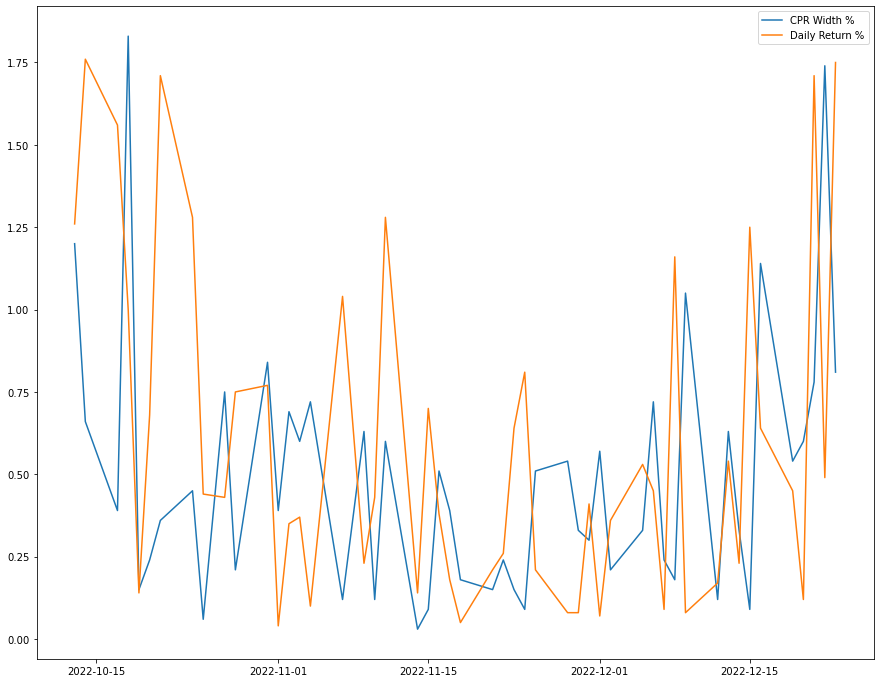

<Figure size 576x360 with 0 Axes>

In [37]:
#####just to help in visualization cpr% is multipied by 3 
plt.plot((dt["cpr%"]*3).tail(50),label="CPR Width %")
plt.plot(abs(dt["Daily Change%"]).tail(50),label="Daily Return %")
plt.legend()
plt.rcParams["figure.figsize"] = (8,5)
plt.figure()
plt.show()

In [38]:
decaymarket=[]
countfalse=0
countnarrow=0
countwide=0
for i in range(len(dt)):
    if dt["NARROW/WIDE"].iloc[i]=="NARROW" and abs(dt["Daily Change%"].iloc[i-1])<0.7:
        decaymarket.append("NARROW OVERALL")
        countnarrow=countnarrow+1
        
    elif dt["NARROW/WIDE"].iloc[i]=="WIDE" and abs(dt["Daily Change%"].iloc[i-1])>0.7:
        decaymarket.append("WIDE OVERALL")
        countwide=countwide+1
    else:
        decaymarket.append(False)
        countfalse=countfalse+1

In [39]:
### Probability of Expected Range
ProbabiltyTrueExpectation=(countwide+countnarrow)/len(dt)
print(round(ProbabiltyTrueExpectation,2))

0.67


In [40]:
### Probability of Event when thesis failed
ProbabiltyFalseExpectation=countfalse/len(dt)
print(round(ProbabiltyFalseExpectation,2))

0.33


In [41]:
###### Conclusion : From the Above graph and probabilty theory, we can conclude that in most cases when the 
#                   CPR% grapth make a trough , there is crest formation in the DailyChange% graph which indicates 
#                   instrument activity shoot up after a low range day and viceversa. 
                  

## MODEL- III (TRADING MODEL BASED ON ABOVE THESIS)

In [42]:
### BASEDON ABOVE RESULT , MODEL CAN BE CREATED WHICH WILL USE A SIMPLE TREND FOLLOWING SYSTEM AND WILL ONLY WORK ON
### DAYS ON WHICH WE WILL GET SIGNAL TO TRADE FROM ABOVE MODEL
### EXPECTATION ARE THAT WE WILL NOT PARTICIPATE ON CHOPPY DAYS 
### TWO TYPES OF COMPARISON OF RESULTS WILL BE THERE :-
###           1.Against OVERALL DF
###           2.Against WIDE CLASSIFED DAYS (AS SYSTEM BEING USED IS TREND FOLLOWING) 

In [43]:
### CODE TO GET "end" DATE AS YESTERDAY'S DATE AND "start" DATE AS DATE EXACTLY YEAR FROM "end" DATE
from datetime import datetime as dt
from datetime import timedelta 
todayDate=dt.now().date()
#prevDate=todayDate-timedelta(hours=24)
end2=todayDate
start2=end2-timedelta(days=365)
start2="2022-01-01"

In [44]:
#### Getting Instrument's Historical Data
ticker2="^NSEBANK"
#ticker2="^NSEI"
#ticker2="RELIANCE.NS"
#ticker2="^DJI"
start=start2
end=end2

df1= yf.download(ticker2, 
                      start=start2, 
                      end=end2, 
                      progress=False,
)


In [45]:
df1.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,35585.199219,36492.101562,35526.601562,36421.898438,36421.898438,219000
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300
2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,38347.898438,206500


In [46]:
prevday_high=df1["High"].iloc[-1]
prevday_close=df1["Close"].iloc[-1]
prevday_low=df1["Low"].iloc[-1]


daily_pivot = (prevday_high + prevday_low + prevday_close)/3 
daily_bc = (prevday_high + prevday_low)/2                    
daily_tc = 2 * daily_pivot - daily_bc                        
                  

In [47]:
## CPR CLASSIFICATION AS  NARROW AND WIDE(TO PREDICT NEXT DAY RANGE EXPECTATION)
#find difference between TOP and BOTTOM Pivot
nextdayclassifier=None
cprdifference=abs(daily_tc-daily_bc)
cprpercent=abs(round(((cprdifference/daily_bc)*100),2))


if cprpercent>0.3:
    nextdayclassifier=("WIDE")
else:
    nextdayclassifier=("NARROW")


#### BACTESTING MODEL AND DATASET CREATION

In [48]:
dt1=df1.iloc[1:len(df1)]

Pivot=[]
BottomCentralPivot=[]
TopCentralPivot=[]


## to make calculation on the whole dataframe
for i in range(len(df1)):
    #print(df1.iloc[i])
    if i==0:
        Pivot.append("NaN") 
        BottomCentralPivot.append("NaN")                   
        TopCentralPivot.append("NaN")
    
    else:
        prevday_high=df1["High"].iloc[i-1]
        prevday_close=df1["Adj Close"].iloc[i-1]
        prevday_low=df1["Low"].iloc[i-1]
        
        dailypivot=(prevday_high + prevday_low + prevday_close)/3
        dailybc=(prevday_high + prevday_low)/2 
        dailytc=(2 * dailypivot) - dailybc  
        
        Pivot.append(dailypivot) 
        BottomCentralPivot.append(dailybc)                   
        TopCentralPivot.append(dailytc)
        
        

In [49]:
####Getting the list into DataFrame
Pivot.pop()
BottomCentralPivot.pop()
TopCentralPivot.pop()
dt1["Pivot"]=Pivot
dt1["BottomCentralPivot"]=BottomCentralPivot
dt1["TopCentralPivot"]=TopCentralPivot


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\602333233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["Pivot"]=Pivot
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\602333233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["BottomCentralPivot"]=BottomCentralPivot
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\602333233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [50]:
cprdiff=[]
classifer=[]
cprdiffpercent=[]
## CPR CLASSIFICATION AS  NARROW AND WIDE
#find difference between TOP and BOTTOM Pivot
for i in range(len(Pivot)):
    if i==0:
        cprdiffpercent.append("NaN")
        classifer.append("NaN")
    else:
        cprdifference=abs(TopCentralPivot[i]-BottomCentralPivot[i])
        cprpercent=abs(round(((cprdifference/BottomCentralPivot[i])*100),2))
        
        cprdiffpercent.append(cprpercent)
        if cprpercent>0.25:
            classifer.append("WIDE")
        else:
            classifer.append("NARROW")
        

In [51]:
#classifer.pop()
#cprdiffpercent.pop()
dt1["cpr%"]=cprdiffpercent
dt1["NARROW/WIDE"]=classifer

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\2585556479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["cpr%"]=cprdiffpercent
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\2585556479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["NARROW/WIDE"]=classifer


In [52]:
#dt1.drop(columns=["Volume","Adj Close"],inplace=True)

dt1["Daily Change%"] = round((dt1["Close"].pct_change(1)) *100,2)
dt1.tail(6)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\1037477515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["Daily Change%"] = round((dt1["Close"].pct_change(1)) *100,2)


,Open,High,Low,Close,Adj Close,Volume,Pivot,BottomCentralPivot,TopCentralPivot,cpr%,NARROW/WIDE,Daily Change%
Date,,,,,,,,,,,,
2022-12-16,43261.750000,43598.199219,43080.550781,43219.500000,43219.500000,275200,44062.950521,44069.875,44056.026042,0.03,NARROW,-0.64
2022-12-19,43346.351562,43451.449219,43110.300781,43413.750000,43413.750000,175600,43665.967448,43749.851562,43582.083333,0.38,WIDE,0.45
2022-12-20,43152.648438,43426.199219,42955.398438,43359.500000,43359.500000,182300,43299.416667,43339.375,43259.458333,0.18,NARROW,-0.12
2022-12-21,43525.750000,43614.648438,42363.800781,42617.949219,42617.949219,279400,43325.166667,43280.875,43369.458333,0.2,NARROW,-1.71
2022-12-22,42864.000000,42933.500000,42231.351562,42408.800781,42408.800781,344800,43247.032552,43190.798828,43303.266276,0.26,WIDE,-0.49
2022-12-23,41951.351562,42226.648438,41597.648438,41668.050781,41668.050781,332600,42865.466146,42989.224609,42741.707682,0.58,WIDE,-1.75


# PART1: TESTING WITH HELP OF CLASSIFIER

In [53]:
### TREND FOLLOWING STRATEGY BASIS :
### ENTRY ABOVE/BELOW VWAP 
### SL- CLOSE BASIS and not beyond 0.75% from OPEN

In [54]:
import talib as tl
dt1["MA25"] = tl.MA(dt1["Close"], timeperiod=10, matype=0)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\4197794423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["MA25"] = tl.MA(dt1["Close"], timeperiod=10, matype=0)


In [55]:
dt1.head(6)

,Open,High,Low,Close,Adj Close,Volume,Pivot,BottomCentralPivot,TopCentralPivot,cpr%,NARROW/WIDE,Daily Change%,MA25
Date,,,,,,,,,,,,,
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,36146.867188,36009.351562,36284.382812,0.76,WIDE,2.32,NaN
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,36700.782552,36631.099609,36770.465495,0.38,WIDE,-0.55,NaN
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,37438.216146,37309.375,37567.057292,0.69,WIDE,0.67,NaN
2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,38347.898438,206500,37433.733073,37405.474609,37461.991536,0.15,NARROW,1.61,NaN
2022-01-11,38370.000000,38504.601562,38031.750000,38442.199219,38442.199219,159500,37767.417969,37781.326172,37753.509766,0.07,NARROW,0.25,NaN


In [56]:
tradetaken=[]
pointsmade=[]
positionType=[]
pnltype=[]
tradedate=[]
classifier=[]

for i in range(len(dt1)):
    Open=dt1["Open"].iloc[i]
    High=dt1["High"].iloc[i]
    Low=dt1["Low"].iloc[i]
    Close=dt1["Close"].iloc[i]
    MA25=dt1["MA25"].iloc[i]
    Classifier=dt1["NARROW/WIDE"].iloc[i]
    classifierpoint=0
    if MA25=="NaN" or Classifier=="WIDE":
        tradetaken.append("NO")
        pointsmade.append(0)
        positionType.append("NaN")
        pnltype.append("NaN")
        tradedate.append(dt1.index[i])
        
    else:
        tradedate.append(dt1.index[i])
        if Open>MA25:
            if Open-((Open)*0.7)/100 < Low:
                
                tradetaken.append("YES")
                pointsmade.append(Close-Open)
                classifierpoint=Close-Open
                positionType.append("BUY")
                if Close-Open>0:
                    pnltype.append("Profit")
                else:
                    pnltype.append("Loss")
                    
            elif Open-((Open)*0.7)/100 > Low:
                tradetaken.append("YES")
                pointsmade.append((((Open)*0.7)/100)*-1)
                classifierpoint=((((Open)*0.7)/100)*-1)
                positionType.append("BUY")
                pnltype.append("Loss")
                
        elif Open<MA25 :
            if Open+((Open)*0.7)/100 > High:
                tradetaken.append("YES")
                pointsmade.append(Open-Close)
                classifierpoint=(Open-Close)
                positionType.append("SELL")
                if Open-Close>0:
                    pnltype.append("Profit")
                else:
                    pnltype.append("Loss")
                
            elif Open+((Open)*0.7)/100 < High:
                tradetaken.append("YES")
                pointsmade.append((((Open)*0.7)/100)*-1)
                classifierpoint=((((Open)*0.7)/100)*-1)
                positionType.append("SELL")
                pnltype.append("Loss")
        else:
            tradetaken.append("NaN")
            pointsmade.append(0)
            positionType.append("NaN")
            pnltype.append("NaN")
        
    classifier.append(round(classifierpoint,2))
                
    
    

In [57]:
dt1["WithClassifier"]=classifier

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\1174159228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["WithClassifier"]=classifier


In [58]:



  
# dictionary of lists 
dict = {"TradeDate":tradedate,'TradeTaken': tradetaken, 'Points': pointsmade, 'Position': positionType,"PnL": pnltype} 
    
tradeledger1 = pd.DataFrame(dict)

In [59]:
tradeledger1.tail(5)

,TradeDate,TradeTaken,Points,Position,PnL
237,2022-12-19,NO,0.000000,NaN,NaN
238,2022-12-20,YES,-206.851562,SELL,Loss
239,2022-12-21,YES,-304.680250,BUY,Loss
240,2022-12-22,NO,0.000000,NaN,NaN
241,2022-12-23,NO,0.000000,NaN,NaN


In [60]:
sum(pointsmade)

1226.7652109375003

<AxesSubplot:>

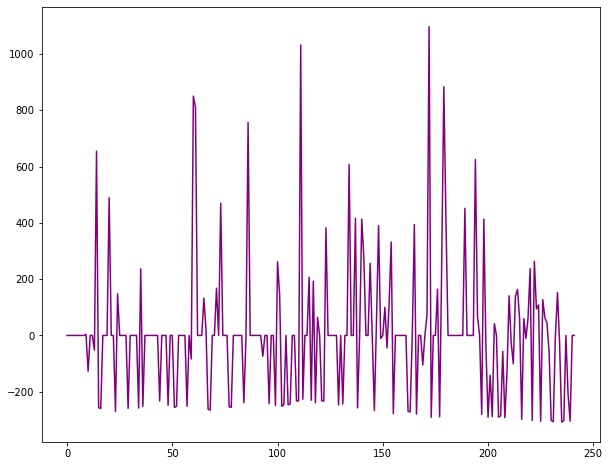

In [61]:
tradeledger1["Points"].plot(figsize=(10,8),color="purple")


## MODEL TESTING WITHOUT HELP OF CLASSIFIER

In [62]:
dt2=dt1

In [63]:
tradetaken=[]
pointsmade=[]
positionType=[]
pnltype=[]
nonclassifier=[]
date=[]

for i in range(len(dt2)):
    Open=dt2["Open"].iloc[i]
    High=dt2["High"].iloc[i]
    Low=dt2["Low"].iloc[i]
    Close=dt2["Close"].iloc[i]
    MA25=dt2["MA25"].iloc[i]
    nonclassifierpoint=0
    
    
    if MA25=="NaN" :
        tradetaken.append("NO")
        pointsmade.append(0)
        positionType.append("NaN")
        pnltype.append("NaN")
    else:
        if Open>MA25:
            if Open-((Open)*0.7)/100 < Low:
                tradetaken.append("YES")
                pointsmade.append(Close-Open)
                nonclassifierpoint=(Close-Open)
                positionType.append("BUY")
                if Close-Open>0:
                    pnltype.append("Profit")
                else:
                    pnltype.append("Loss")
                    
            elif Open-((Open)*0.7)/100 > Low:
                tradetaken.append("YES")
                pointsmade.append((((Open)*0.7)/100)*-1)
                nonclassifierpoint=((((Open)*0.7)/100)*-1)
                positionType.append("BUY")
                pnltype.append("Loss")
                
        elif Open<MA25 :
            if Open+((Open)*0.7)/100 > High:
                tradetaken.append("YES")
                pointsmade.append(Open-Close)
                nonclassifierpoint=(Open-Close)
                positionType.append("SELL")
                if Open-Close>0:
                    pnltype.append("Profit")
                else:
                    pnltype.append("Loss")
                
            elif Open+((Open)*0.7)/100 < High:
                tradetaken.append("YES")
                pointsmade.append((((Open)*0.7)/100)*-1)
                nonclassifierpoint=((((Open)*0.7)/100)*-1)
                positionType.append("SELL")
                pnltype.append("Loss")
        else:
            tradetaken.append("NaN")
            pointsmade.append(0)
            positionType.append("NaN")
            pnltype.append("NaN")
        nonclassifier.append(round(nonclassifierpoint,2))
        date.append(dt2.index[i])
    
    

In [64]:
dt1["Without Classifier"]=nonclassifier

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\2780569704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["Without Classifier"]=nonclassifier


In [65]:
dict = {"Date" : date,'TradeTaken': tradetaken, 'Points': pointsmade, 'Position': positionType,"PnL": pnltype} 
    
tradeledger2 = pd.DataFrame(dict)

In [66]:
(tradeledger2.dropna(axis=1,inplace=True))
tradeledger2

,Date,TradeTaken,Points,Position,PnL
0,2022-01-04,NaN,0.000000,NaN,NaN
1,2022-01-05,NaN,0.000000,NaN,NaN
2,2022-01-06,NaN,0.000000,NaN,NaN
3,2022-01-07,NaN,0.000000,NaN,NaN
4,2022-01-10,NaN,0.000000,NaN,NaN
...,...,...,...,...,...
237,2022-12-19,YES,-67.398438,SELL,Loss
238,2022-12-20,YES,-206.851562,SELL,Loss
239,2022-12-21,YES,-304.680250,BUY,Loss
240,2022-12-22,YES,455.199219,SELL,Profit


In [67]:
sum(pointsmade)

151.96189257812773

<AxesSubplot:>

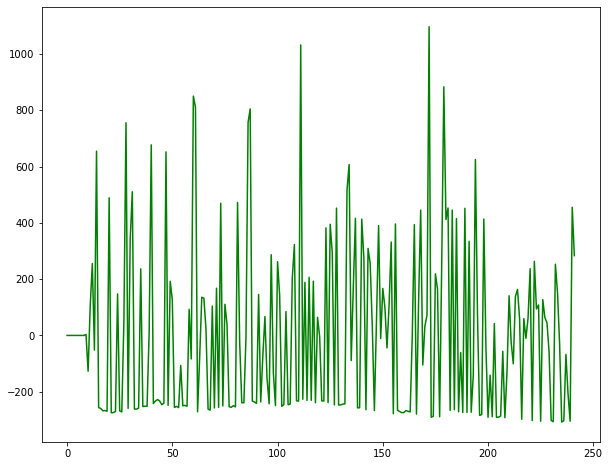

In [68]:
tradeledger2["Points"].plot(figsize=(10,8),color="green")

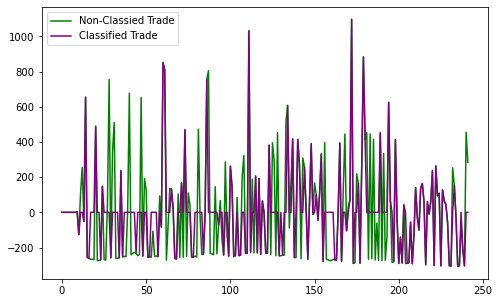

<Figure size 1080x864 with 0 Axes>

In [69]:
plt.plot(tradeledger2["Points"],color="green",label="Non-Classied Trade")
plt.plot(tradeledger1["Points"],color="purple",label="Classified Trade")
plt.legend()
plt.rcParams["figure.figsize"] = (15,12)
plt.figure()
plt.show()

In [70]:
total=sum(tradeledger1["Points"])

In [71]:
margin=120000
percentage_ret=((((total)))*25/margin)*100

In [72]:
percentage_ret

25.557608561197924

## QUANTITATIVE ANALYSIS

In [73]:
###tradelegder1 contains data with classifier model
###tradeledger2 contains data without classifier model

In [74]:
dt1.head(6)

,Open,High,Low,Close,Adj Close,Volume,Pivot,BottomCentralPivot,TopCentralPivot,cpr%,NARROW/WIDE,Daily Change%,MA25,WithClassifier,Without Classifier
Date,,,,,,,,,,,,,,,
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,36146.867188,36009.351562,36284.382812,0.76,WIDE,2.32,NaN,0.0,0.0
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,36700.782552,36631.099609,36770.465495,0.38,WIDE,-0.55,NaN,0.0,0.0
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,37438.216146,37309.375,37567.057292,0.69,WIDE,0.67,NaN,0.0,0.0
2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,38347.898438,206500,37433.733073,37405.474609,37461.991536,0.15,NARROW,1.61,NaN,0.0,0.0
2022-01-11,38370.000000,38504.601562,38031.750000,38442.199219,38442.199219,159500,37767.417969,37781.326172,37753.509766,0.07,NARROW,0.25,NaN,0.0,0.0


In [75]:
#### setting the margin
margin1=dt1["Open"].iloc[0]
margin2=dt1["Open"].iloc[0]
kpi=pd.DataFrame()

In [76]:
Classifierreturn=[]
NonClassifierreturn=[]
for i in range(len(dt1)):
    # For Calculating returns with Classifier Model
    margin1=dt1["WithClassifier"].iloc[i]+margin1
    Classifierreturn.append(round(margin1,2))
    margin2=dt1["Without Classifier"].iloc[i]+margin2
    NonClassifierreturn.append(round(margin2,2))
    

In [77]:
kpi["Classifier"]=pd.DataFrame(Classifierreturn)
kpi["Non-Classifier"]=pd.DataFrame(NonClassifierreturn)
a=list(dt1["Close"])


In [78]:
kpi.head(5)

,Classifier,Non-Classifier
0,36551.25,36551.25
1,36551.25,36551.25
2,36551.25,36551.25
3,36551.25,36551.25
4,36551.25,36551.25


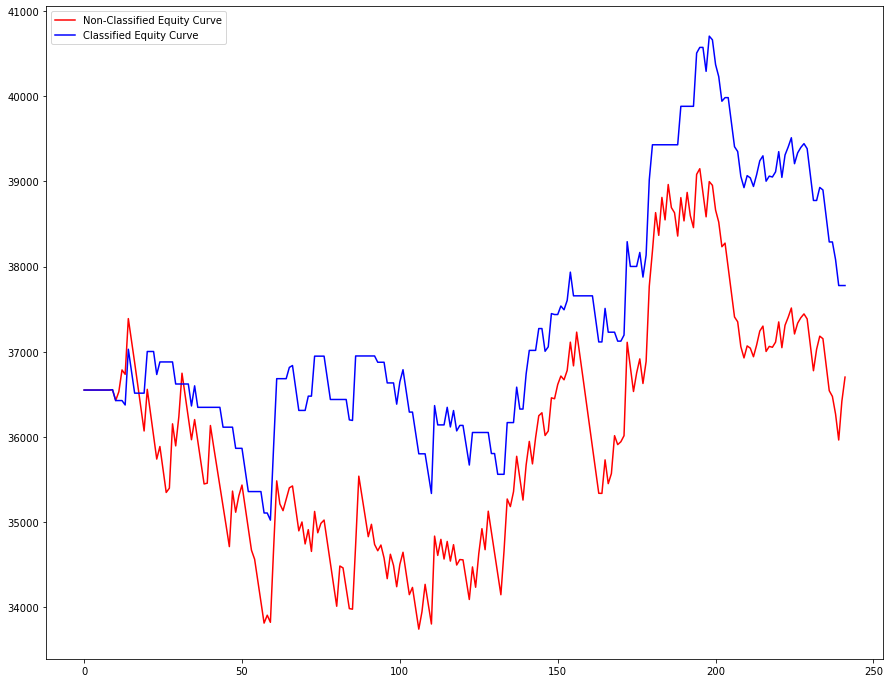

<Figure size 1080x864 with 0 Axes>

In [79]:
plt.plot(kpi["Non-Classifier"],color="red",label="Non-Classified Equity Curve")
plt.plot(kpi["Classifier"],color="blue",label="Classified Equity Curve")

plt.legend()
plt.rcParams["figure.figsize"] = (15,12)
plt.figure()
plt.show()




In [80]:
dt1.head(5)

,Open,High,Low,Close,Adj Close,Volume,Pivot,BottomCentralPivot,TopCentralPivot,cpr%,NARROW/WIDE,Daily Change%,MA25,WithClassifier,Without Classifier
Date,,,,,,,,,,,,,,,
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,36146.867188,36009.351562,36284.382812,0.76,WIDE,2.32,NaN,0.0,0.0
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,36700.782552,36631.099609,36770.465495,0.38,WIDE,-0.55,NaN,0.0,0.0
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,37438.216146,37309.375,37567.057292,0.69,WIDE,0.67,NaN,0.0,0.0
2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,38347.898438,206500,37433.733073,37405.474609,37461.991536,0.15,NARROW,1.61,NaN,0.0,0.0


In [81]:
#### month assignment
i=0
month=[]
monthdig=None
for i in range(len(dt1)):
    monthdig=(str(dt1.index[i]).split("-")[1])
    if monthdig=="01":
        month.append("Jan")
    if monthdig=="02":
        month.append("Feb")
    if monthdig=="03":
        month.append("Mar")
    if monthdig=="04":
        month.append("Apr")
    if monthdig=="05":
        month.append("May")
    if monthdig=="06":
        month.append("Jun")
    if monthdig=="07":
        month.append("Jul")
    if monthdig=="08":
        month.append("Aug")
    if monthdig=="09":
        month.append("Sep")
    if monthdig=="10":
        month.append("Oct")
    if monthdig=="11":
        month.append("Nov")
    if monthdig=="12":
        month.append("Dec")
        

In [82]:
dt1["Month"]=pd.DataFrame(month)
kpi["Month"]=pd.DataFrame(month)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19272\1841547482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["Month"]=pd.DataFrame(month)


In [83]:
dt1.head(5)

,Open,High,Low,Close,Adj Close,Volume,Pivot,BottomCentralPivot,TopCentralPivot,cpr%,NARROW/WIDE,Daily Change%,MA25,WithClassifier,Without Classifier,Month
Date,,,,,,,,,,,,,,,,
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,36146.867188,36009.351562,36284.382812,0.76,WIDE,2.32,NaN,0.0,0.0,NaN
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,36700.782552,36631.099609,36770.465495,0.38,WIDE,-0.55,NaN,0.0,0.0,NaN
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,37438.216146,37309.375,37567.057292,0.69,WIDE,0.67,NaN,0.0,0.0,NaN
2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,38347.898438,206500,37433.733073,37405.474609,37461.991536,0.15,NARROW,1.61,NaN,0.0,0.0,NaN


#### Monthly Return of Non- Classifier Model

In [84]:

month=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
for j in month:
    monthwise=0
    count=0
    
    for i in range(len(dt1)):
        if kpi["Month"].iloc[i]==j:
            monthwise=monthwise+dt1["WithClassifier"].iloc[i]
            count=count+1
            #print("1")
    globals()[f"{j}monthwise"]=round(monthwise,2)
    print(j)
    print(f"Points Captured in {j} = "+str(globals()[f"{j}monthwise"]))
    globals()[f"{j}count"]=count
    print(f"Numbers of Trade Taken in {j} = "+str(globals()[f"{j}count"]))
    
    print("____________________________________________________________")



Jan
Points Captured in Jan = -36.65
Numbers of Trade Taken in Jan = 19
____________________________________________________________
Feb
Points Captured in Feb = -166.4
Numbers of Trade Taken in Feb = 20
____________________________________________________________
Mar
Points Captured in Mar = -1324.0
Numbers of Trade Taken in Mar = 21
____________________________________________________________
Apr
Points Captured in Apr = 1416.19
Numbers of Trade Taken in Apr = 19
____________________________________________________________
May
Points Captured in May = -54.97
Numbers of Trade Taken in May = 21
____________________________________________________________
Jun
Points Captured in Jun = -481.76
Numbers of Trade Taken in Jun = 22
____________________________________________________________
Jul
Points Captured in Jul = 1113.06
Numbers of Trade Taken in Jul = 21
____________________________________________________________
Aug
Points Captured in Aug = 370.72
Numbers of Trade Taken in Aug = 20
_

#### Monthly Return of Non- Classifier Model

In [85]:

month=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
for j in month:
    monthwise=0
    count=0
    
    for i in range(len(dt1)):
        if kpi["Month"].iloc[i]==j:
            monthwise=monthwise+dt1["Without Classifier"].iloc[i]
            count=count+1
            #print("1")
    globals()[f"{j}monthwise"]=round(monthwise,2)
    print(j)
    print(f"Points Captured in {j} = "+str(globals()[f"{j}monthwise"]))
    globals()[f"{j}count"]=count
    print(f"Numbers of Trade Taken in {j} = "+str(globals()[f"{j}count"]))
    
    print("____________________________________________________________")



Jan
Points Captured in Jan = -211.37
Numbers of Trade Taken in Jan = 19
____________________________________________________________
Feb
Points Captured in Feb = -891.0
Numbers of Trade Taken in Feb = 20
____________________________________________________________
Mar
Points Captured in Mar = -1624.41
Numbers of Trade Taken in Mar = 21
____________________________________________________________
Apr
Points Captured in Apr = 691.78
Numbers of Trade Taken in Apr = 19
____________________________________________________________
May
Points Captured in May = -273.87
Numbers of Trade Taken in May = 21
____________________________________________________________
Jun
Points Captured in Jun = 83.09
Numbers of Trade Taken in Jun = 22
____________________________________________________________
Jul
Points Captured in Jul = 1358.76
Numbers of Trade Taken in Jul = 21
____________________________________________________________
Aug
Points Captured in Aug = -73.31
Numbers of Trade Taken in Aug = 20
_

#### Performance Report of Classifier Model

In [86]:
## Number of Trades Taken 
tradenum=0
profit=0
profitsum=0
loss=0
losssum=0
maxpoint=0
minpoint=0
for i in tradeledger1["Points"]:
    if i>0 or i<0:
        tradenum=tradenum+1
        if i>0:
            profit=profit+1
            profitsum=profitsum+i
            if maxpoint<i:
                maxpoint=i
        if i<0:
            loss=loss+1
            losssum=losssum+i
            
            if minpoint>i:
                minpoint=i
            



#### Prepaing the Standard Report 

In [87]:
print("Number of Trades Taken :\t\t\t"+str(tradenum))
print("Number of Profitable Position:  \t\t"+str(profit))
print("Number of Unprofitable Position :\t\t"+str(loss))
print("Net Profit : \t\t\t\t\t"+str(round(profitsum+losssum,2)))
print("Total Points made with Profitable Positions :  \t"+str(round(profitsum,2)))
print("Total Points made with Unprofitable Positions :"+str(round(losssum,2)))
print("Average Profitable Trade : \t\t\t"+str(round((profitsum/profit),2)))
print("Average Unprofitable Trade : \t\t\t"+str(round((losssum/loss),2)))
print("Winner to Loser Ratio :\t\t\t\t"+str(round((profit/loss),2)))
print("Largest Profitable Position :\t\t\t"+str(round(maxpoint,2)))
print("Largest Unprofitable Position :\t\t\t"+str(round(minpoint,2)))

Number of Trades Taken :			126
Number of Profitable Position:  		55
Number of Unprofitable Position :		71
Net Profit : 					1226.77
Total Points made with Profitable Positions :  	16563.0
Total Points made with Unprofitable Positions :-15336.23
Average Profitable Trade : 			301.15
Average Unprofitable Trade : 			-216.0
Winner to Loser Ratio :				0.77
Largest Profitable Position :			1096.6
Largest Unprofitable Position :			-307.58


#### Performance Report of Non- Classifier Model

In [88]:
## Number of Trades Taken 
tradenum2=0
profit2=0
profitsum2=0
loss2=0
losssum2=0
maxpoint2=0
minpoint2=0
for i in tradeledger2["Points"]:
    if i>0 or i<0:
        tradenum2=tradenum2+1
        if i>0:
            profit2=profit2+1
            profitsum2=profitsum2+i
            if maxpoint2<i:
                maxpoint2=i
        if i<0:
            loss2=loss2+1
            losssum2=losssum2+i
            
            if minpoint2>i:
                minpoint2=i
            



In [89]:
print("Number of Trades Taken :\t\t\t"+str(tradenum2))
print("Number of Profitable Position:  \t\t"+str(profit2))
print("Number of Unprofitable Position :\t\t"+str(loss2))
print("Net Profit : \t\t\t\t\t"+str(round(profitsum2+losssum2,2)))
print("Total Points made with Profitable Positions :  \t"+str(round(profitsum2,2)))
print("Total Points made with Unprofitable Positions :"+str(round(losssum2,2)))
print("Average Profitable Trade : \t\t\t"+str(round((profitsum2/profit2),2)))
print("Average Unprofitable Trade : \t\t\t"+str(round((losssum2/loss2),2)))
print("Winner to Loser Ratio :\t\t\t\t"+str(round((profit2/loss2),2)))
print("Largest Profitable Position :\t\t\t"+str(round(maxpoint2,2)))
print("Largest Unprofitable Position :\t\t\t"+str(round(minpoint2,2)))

Number of Trades Taken :			233
Number of Profitable Position:  		100
Number of Unprofitable Position :		133
Net Profit : 					151.96
Total Points made with Profitable Positions :  	29487.58
Total Points made with Unprofitable Positions :-29335.62
Average Profitable Trade : 			294.88
Average Unprofitable Trade : 			-220.57
Winner to Loser Ratio :				0.75
Largest Profitable Position :			1096.6
Largest Unprofitable Position :			-307.58


## Strategy Performance Simulator

In [100]:
tradeledger1

,TradeDate,TradeTaken,Points,Position,PnL
0,2022-01-04,NaN,0.000000,NaN,NaN
1,2022-01-05,NO,0.000000,NaN,NaN
2,2022-01-06,NO,0.000000,NaN,NaN
3,2022-01-07,NO,0.000000,NaN,NaN
4,2022-01-10,NaN,0.000000,NaN,NaN
...,...,...,...,...,...
237,2022-12-19,NO,0.000000,NaN,NaN
238,2022-12-20,YES,-206.851562,SELL,Loss
239,2022-12-21,YES,-304.680250,BUY,Loss
240,2022-12-22,NO,0.000000,NaN,NaN


In [186]:
threshold_sum=0
startingcap=800000
Trade_taken=[]
threshold_sum_list=[]
totalcap_list=[]
amount_on_day_list=[]

totalcap=startingcap
i=0
daypassed=0
z=False
dailyreturn=[]
netcap=[]
dates=[]
fatalerror=0
lots=[]
capcounter=totalcap
lotredcount=0
capperlot=155000
Pointslist=[]
maxlot=10
payoff=0
while i!=len(tradeledger2)-1:
    
    lot=int(totalcap/capperlot)*25
    nlot=lot
    x=totalcap
    print("X val    "+str(x))
    
    y=1
    
    
    print("Number of Lots   "+str(lot/25))
    while z==False and i<len(tradeledger2)-1:
        if (totalcap)<(lot/25)*20000:
            print("Fatal Error_________________")
            lot=int(totalcap/capperlot)*25
            fatalerror=fatalerror+1
        print(capcounter*0.85)
        if totalcap*0.85>capcounter*0.85:
            capcounter=totalcap
        if capcounter*0.85>totalcap and lotredcount==0:
            print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            lot=int(totalcap/(capperlot+2000))*25
            #lot=lot
            lotredcount=0
            capcounter=totalcap
            x=totalcap/2
        if daypassed==1:
            print("TOTALCAP "+str(totalcap))
        if lot>maxlot*25:
            print("excedd...............")
            lot=maxlot*25
        Points=tradeledger2["Points"].iloc[i]
        
        Pointslist.append(int(Points))
        threshold_sum=threshold_sum+(Points)*lot
        totalcap=int(totalcap+(Points)*lot)
        if Points==0:
            Trade_taken.append('No')
        else:
            Trade_taken.append('Yes')
        
        amount_on_day_list.append(int((Points*lot)))
        totalcap_list.append(int(totalcap))
        threshold_sum_list.append(int(threshold_sum))
        
        
        print(str(tradeledger2["Date"].iloc[i])+"       "+str(daypassed)+"    "+str(int(threshold_sum))+"   "+str(int(lot/25))+"      "+str(int((Points*lot))) +"\t\ttotalcap"+str(totalcap))
        ####################
        if capcounter*0.85>totalcap and lotredcount==0:
            print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            nlot=int(totalcap/(capperlot+10000))*25
            #lot=lot
            lotredcount=0
            capcounter=totalcap
        print(str(tradeledger2["Date"].iloc[i])+" nextday lot  - "+str(nlot/25))
        ####################
        dailyreturn.append(int(Points*lot))
        dates.append(tradeledger2["Date"].iloc[i])
        lots.append(lot/25)
        
        daypassed=daypassed+1
        i=i+1
        if threshold_sum>x and daypassed>y:
            z=True
            print("____________________________________________________")
            
    daypassed=0
    #totalcap=int(totalcap+threshold_sum)
    ###################
    #payoffterm=0
    #payoffterm=totalcap/20
    #totalcap=totalcap-payoffterm
    #payoff=payoff+payoffterm
    #if lot==maxlot*25:
    #    payoffterm=totalcap-(capperlot*(lot/25))-totalcap/10
    #    totalcap=totalcap-payoffterm
    #    
    #    payoff=payoffterm+payoff
    #print("Payoff Of current term = "+str(payoffterm) )
    #################
    capcounter=int(totalcap)
    lotredcount=0
    print("totalcap is \t" +str(totalcap))
    print("Payoff Amount till now = "+ str(payoff))
    print("Captial Change from Initial value = "+str(totalcap-startingcap+payoff))
    print("Percentage Return % (ROC) = " +str((totalcap-startingcap+payoff)/startingcap*100))
    
    threshold_sum=0
    z=False
    



X val    800000
Number of Lots   5.0
680000.0
2022-01-04 00:00:00       0    0   5      0		totalcap800000
2022-01-04 00:00:00 nextday lot  - 5.0
680000.0
TOTALCAP 800000
2022-01-05 00:00:00       1    0   5      0		totalcap800000
2022-01-05 00:00:00 nextday lot  - 5.0
680000.0
2022-01-06 00:00:00       2    0   5      0		totalcap800000
2022-01-06 00:00:00 nextday lot  - 5.0
680000.0
2022-01-07 00:00:00       3    0   5      0		totalcap800000
2022-01-07 00:00:00 nextday lot  - 5.0
680000.0
2022-01-10 00:00:00       4    0   5      0		totalcap800000
2022-01-10 00:00:00 nextday lot  - 5.0
680000.0
2022-01-11 00:00:00       5    0   5      0		totalcap800000
2022-01-11 00:00:00 nextday lot  - 5.0
680000.0
2022-01-12 00:00:00       6    0   5      0		totalcap800000
2022-01-12 00:00:00 nextday lot  - 5.0
680000.0
2022-01-13 00:00:00       7    0   5      0		totalcap800000
2022-01-13 00:00:00 nextday lot  - 5.0
680000.0
2022-01-14 00:00:00       8    0   5      0		totalcap800000
2022-01-14 00:

2022-06-24 00:00:00       117    -226906   5      24081		totalcap573040
2022-06-24 00:00:00 nextday lot  - 2.0
497764.25
2022-06-27 00:00:00       118    -256766   5      -29860		totalcap543179
2022-06-27 00:00:00 nextday lot  - 2.0
497764.25
2022-06-28 00:00:00       119    -248735   5      8031		totalcap551210
2022-06-28 00:00:00 nextday lot  - 2.0
497764.25
2022-06-29 00:00:00       120    -249191   5      -456		totalcap550753
2022-06-29 00:00:00 nextday lot  - 2.0
497764.25
2022-06-30 00:00:00       121    -278225   5      -29033		totalcap521719
2022-06-30 00:00:00 nextday lot  - 2.0
497764.25
2022-07-01 00:00:00       122    -307331   5      -29106		totalcap492612
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
2022-07-01 00:00:00 nextday lot  - 2.0
418720.2
2022-07-04 00:00:00       123    -259575   5      47755		totalcap540367
2022-07-04 00:00:00 nextday lot  - 2.0
418720.2
2022-07-05 00:00:00       124    -289399   5      -29824		totalcap510542
2022-07-05 00:00:00 nextday 

2022-12-16 00:00:00       236    -950   5      -37854		totalcap798931
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
2022-12-16 00:00:00 nextday lot  - 4.0
679091.35
2022-12-19 00:00:00       237    -9375   5      -8424		totalcap790506
2022-12-19 00:00:00 nextday lot  - 4.0
679091.35
2022-12-20 00:00:00       238    -35232   5      -25856		totalcap764649
2022-12-20 00:00:00 nextday lot  - 4.0
679091.35
2022-12-21 00:00:00       239    -73317   5      -38085		totalcap726563
2022-12-21 00:00:00 nextday lot  - 4.0
679091.35
2022-12-22 00:00:00       240    -16417   5      56899		totalcap783462
2022-12-22 00:00:00 nextday lot  - 4.0
totalcap is 	783462
Payoff Amount till now = 0
Captial Change from Initial value = -16538
Percentage Return % (ROC) = -2.06725


In [188]:
dictionary = {'Date': TradeDates ,'Trade Condition'  : Trade_taken,"Lots": lots,"Overall PNL":threshold_sum_list,"Daily Return %" : dailyreturn, "Point" : Pointslist,"Day PNL":amount_on_day_list ,"Total Capital":totalcap_list}
TradeReport1=pd.DataFrame(dictionary)
totalcap=startingcap
netcap=[]
for i in range(len(TradeReport1)):
    totalcap=totalcap+TradeReport1["Daily Return %"].iloc[i]
    netcap.append(totalcap)
TradeReport1["Total Capital"]=netcap


In [189]:
threshold_sum=0
startingcap=800000
Trade_taken=[]
threshold_sum_list=[]
totalcap_list=[]
amount_on_day_list=[]
totalcap=startingcap
i=0
daypassed=0
z=False
dailyreturn=[]
netcap=[]
TradeDates=[]
fatalerror=0
lots=[]
capcounter=totalcap
lotredcount=0
capperlot=155000
Pointslist=[]
maxlot=10
payoff=0
while i!=len(tradeledger1)-1:
    
    lot=int(totalcap/capperlot)*25
    nlot=lot
    x=totalcap
    print("X val    "+str(x))
    
    y=1
    
    
    print("Number of Lots   "+str(lot/25))
    while z==False and i<len(tradeledger1)-1:
        if (totalcap)<(lot/25)*20000:
            print("Fatal Error_________________")
            lot=int(totalcap/capperlot)*25
            fatalerror=fatalerror+1
        print(capcounter*0.85)
        if totalcap*0.85>capcounter*0.85:
            capcounter=totalcap
        if capcounter*0.85>totalcap and lotredcount==0:
            print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            lot=int(totalcap/(capperlot+2000))*25
            #lot=lot
            lotredcount=0
            capcounter=totalcap
            x=totalcap/2
        if daypassed==1:
            print("TOTALCAP "+str(totalcap))
        if lot>maxlot*25:
            print("excedd...............")
            lot=maxlot*25
        Points=tradeledger1["Points"].iloc[i]
        Pointslist.append(int(Points))
        threshold_sum=threshold_sum+(Points)*lot
        totalcap=int(totalcap+(Points)*lot)
        if Points==0:
            Trade_taken.append('No')
        else:
            Trade_taken.append('Yes')
        
        amount_on_day_list.append(int((Points*lot)))
        totalcap_list.append(int(totalcap))
        threshold_sum_list.append(int(threshold_sum))
        
        
        print(str(tradeledger1["TradeDate"].iloc[i])+"       "+str(daypassed)+"    "+str(int(threshold_sum))+"   "+str(int(lot/25))+"      "+str(int((Points*lot))) +"\t\ttotalcap"+str(totalcap))
        ####################
        if capcounter*0.85>totalcap and lotredcount==0:
            print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            nlot=int(totalcap/(capperlot+10000))*25
            #lot=lot
            lotredcount=0
            capcounter=totalcap
        print(str(tradeledger1["TradeDate"].iloc[i])+" nextday lot  - "+str(nlot/25))
        ####################
        dailyreturn.append(int(Points*lot))
        TradeDates.append(tradeledger1["TradeDate"].iloc[i])
        lots.append(lot/25)
        
        daypassed=daypassed+1
        i=i+1
        if threshold_sum>x and daypassed>y:
            z=True
            print("____________________________________________________")
            
    daypassed=0
    #totalcap=int(totalcap+threshold_sum)
    ###################
    #payoffterm=0
    #payoffterm=totalcap/20
    #totalcap=totalcap-payoffterm
    #payoff=payoff+payoffterm
    #if lot==maxlot*25:
    #    payoffterm=totalcap-(capperlot*(lot/25))-totalcap/10
    #    totalcap=totalcap-payoffterm
    #    
    #    payoff=payoffterm+payoff
    #print("Payoff Of current term = "+str(payoffterm) )
    #################
    capcounter=int(totalcap)
    lotredcount=0
    print("totalcap is \t" +str(totalcap))
    print("Payoff Amount till now = "+ str(payoff))
    print("Captial Change from Initial value = "+str(totalcap-startingcap+payoff))
    print("Percentage Return % (ROC) = " +str((totalcap-startingcap+payoff)/startingcap*100))
    
    threshold_sum=0
    z=False
    



X val    800000
Number of Lots   5.0
680000.0
2022-01-04 00:00:00       0    0   5      0		totalcap800000
2022-01-04 00:00:00 nextday lot  - 5.0
680000.0
TOTALCAP 800000
2022-01-05 00:00:00       1    0   5      0		totalcap800000
2022-01-05 00:00:00 nextday lot  - 5.0
680000.0
2022-01-06 00:00:00       2    0   5      0		totalcap800000
2022-01-06 00:00:00 nextday lot  - 5.0
680000.0
2022-01-07 00:00:00       3    0   5      0		totalcap800000
2022-01-07 00:00:00 nextday lot  - 5.0
680000.0
2022-01-10 00:00:00       4    0   5      0		totalcap800000
2022-01-10 00:00:00 nextday lot  - 5.0
680000.0
2022-01-11 00:00:00       5    0   5      0		totalcap800000
2022-01-11 00:00:00 nextday lot  - 5.0
680000.0
2022-01-12 00:00:00       6    0   5      0		totalcap800000
2022-01-12 00:00:00 nextday lot  - 5.0
680000.0
2022-01-13 00:00:00       7    0   5      0		totalcap800000
2022-01-13 00:00:00 nextday lot  - 5.0
680000.0
2022-01-14 00:00:00       8    0   5      0		totalcap800000
2022-01-14 00:

2022-09-28 00:00:00       182    359891   5      0		totalcap1159848
2022-09-28 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-09-29 00:00:00       183    359891   5      0		totalcap1159848
2022-09-29 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-09-30 00:00:00       184    359891   5      0		totalcap1159848
2022-09-30 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-10-03 00:00:00       185    359891   5      0		totalcap1159848
2022-10-03 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-10-04 00:00:00       186    359891   5      0		totalcap1159848
2022-10-04 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-10-06 00:00:00       187    359891   5      0		totalcap1159848
2022-10-06 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-10-07 00:00:00       188    359891   5      0		totalcap1159848
2022-10-07 00:00:00 nextday lot  - 4.0
985870.7999999999
2022-10-10 00:00:00       189    416335   5      56443		totalcap1216291
2022-10-10 00:00:00 nextday lot  - 4.0
985870.7999999

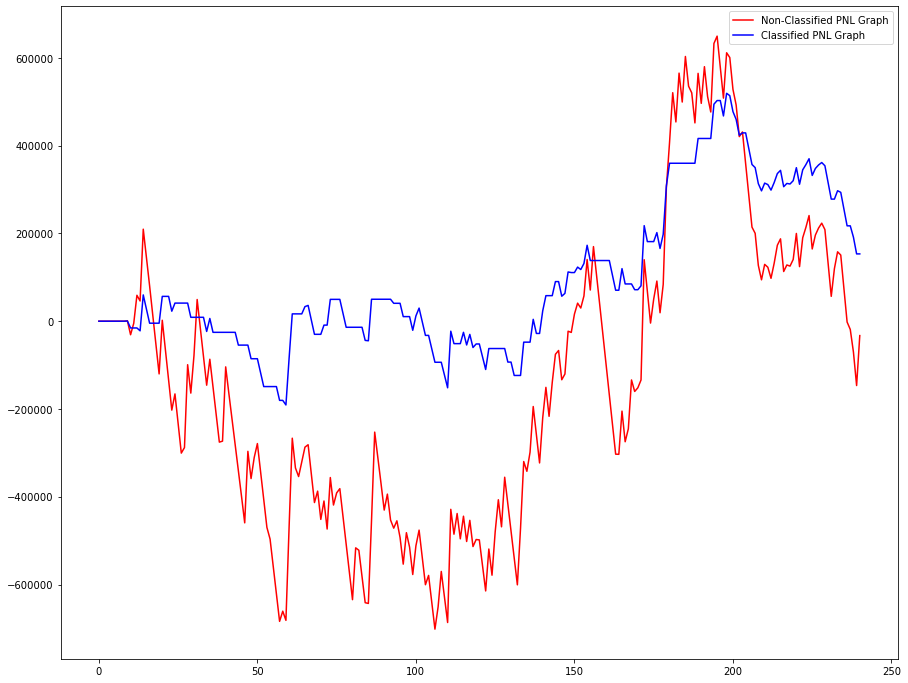

<Figure size 1080x864 with 0 Axes>

In [192]:
dictionary = {'Date': TradeDates ,'Trade Condition'  : Trade_taken,"Lots": lots,"Overall PNL":threshold_sum_list,"Daily Return %" : dailyreturn, "Point" : Pointslist,"Day PNL":amount_on_day_list ,"Total Capital":totalcap_list}
TradeReport1=pd.DataFrame(dictionary)
totalcap=startingcap
netcap=[]
for i in range(len(TradeReport1)):
    totalcap=totalcap+TradeReport1["Daily Return %"].iloc[i]
    netcap.append(totalcap)
TradeReport1["Total Capital"]=netcap
# TradeReport1["Total Capital"].plot()

plt.plot(TradeReport2["Overall PNL"],color="red",label="Non-Classified PNL Graph")
plt.plot(TradeReport1["Overall PNL"],color="blue",label="Classified PNL Graph")

plt.legend()
plt.rcParams["figure.figsize"] = (15,12)
plt.figure()
plt.show()


In [185]:
## Classifier Trading System
pd.set_option('display.max_rows', 15895)
TradeReport1

,Date,Trade Condition,Lots,Overall PNL,Daily Return %,Point,Day PNL,Total Capital
0,2022-01-04,No,5.0,0,0,0,0,800000
1,2022-01-05,No,5.0,0,0,0,0,800000
2,2022-01-06,No,5.0,0,0,0,0,800000
3,2022-01-07,No,5.0,0,0,0,0,800000
4,2022-01-10,No,5.0,0,0,0,0,800000
5,2022-01-11,No,5.0,0,0,0,0,800000
6,2022-01-12,No,5.0,0,0,0,0,800000
7,2022-01-13,No,5.0,0,0,0,0,800000
8,2022-01-14,No,5.0,0,0,0,0,800000
9,2022-01-17,Yes,5.0,449,449,3,449,800449


In [193]:
## Non - Classifier Trading System
TradeReport2

,Date,Trade Condition,Lots,Overall PNL,Daily Return %,Point,Day PNL,Total Capital
0,2022-01-04,No,10.0,0,0,0,0,1800000
1,2022-01-05,No,10.0,0,0,0,0,1800000
2,2022-01-06,No,10.0,0,0,0,0,1800000
3,2022-01-07,No,10.0,0,0,0,0,1800000
4,2022-01-10,No,10.0,0,0,0,0,1800000
5,2022-01-11,No,10.0,0,0,0,0,1800000
6,2022-01-12,No,10.0,0,0,0,0,1800000
7,2022-01-13,No,10.0,0,0,0,0,1800000
8,2022-01-14,No,10.0,0,0,0,0,1800000
9,2022-01-17,Yes,10.0,899,899,3,899,1800899
